#  BTC Price Prediction with Polynomial Linear Regression Model

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

### Getting BTC-USD data from yahoo finance with pandas_datareader

In [2]:
data = pdr.get_data_yahoo("BTC-USD")
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-25,3950.250000,3681.580078,3681.580078,3926.070068,1374210048,3926.070068
2017-09-26,3969.889893,3869.899902,3928.409912,3892.350098,1043740032,3892.350098
2017-09-27,4210.049805,3884.820068,3892.939941,4200.669922,1686880000,4200.669922
2017-09-28,4279.310059,4109.700195,4197.129883,4174.729980,1712320000,4174.729980
2017-09-29,4214.629883,4039.290039,4171.620117,4163.069824,1367049984,4163.069824


### We are looking only Adjusted Close price for our predictions

<AxesSubplot:xlabel='Date'>

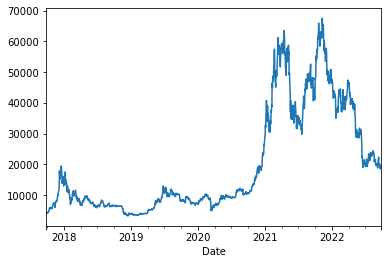

In [3]:
df_adj = data['Adj Close']
df_adj.plot()

#### It shows all prices since September 2017

### Setting data set into independent y (price) and dependent x (time) variables

In [4]:
x = np.array(range(1,len(data))).reshape(-1,1)
y = df_adj.iloc[1:].to_numpy().reshape(-1,1)
len(x), len(y)

(1825, 1825)

### Make Prediction with Linear Regression Polynomial model
#### We choose degree of polynomial and apply linear regression with pipeline and train model from 1350 time frame (06/06/2021) to today

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=7
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x[1350:],y[1350:])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

### Plotting prediction until January 2023 which is around $5000 at that time

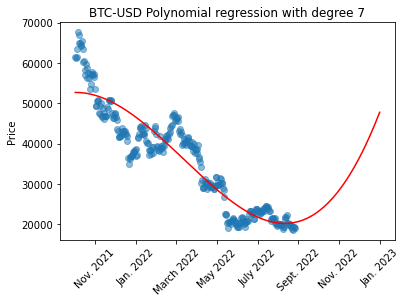

In [10]:
plt.figure()
plt.scatter(x[1500:],y[1500:], alpha=0.5)
x_pred = np.array(range(1,1951)).reshape(-1,1)
plt.plot(x_pred[1500:],polyreg.predict(x_pred[1500:]),color="red")
plt.xticks([1530, 1590, 1650, 1710, 1770, 1830, 1890, 1950],['Nov. 2021','Jan. 2022', 'March 2022', 'May 2022', 'July 2022', 'Sept. 2022', 'Nov. 2022', 'Jan. 2023'])
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.title("BTC-USD Polynomial regression with degree "+str(degree))
plt.show()